# PredictStudentsDropoutAndAcademicSuccess

# Polytechnic Institute of Portalegre

### TableOfContents

* [Initialization](#Initialization)

* [RandomForest](#RandomForest)

* [ANN](#ANN)

* [HistGradientBoostingClassifier](#HistGradientBoostingClassifier)

* [Predict](#Predict)

# Initialization
[BackToTop](#PredictStudentsDropoutAndAcademicSuccess)

In [3]:
#import
#--------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import (
    GridSearchCV,
    train_test_split)

from sklearn.ensemble import (
    RandomForestClassifier,
    HistGradientBoostingClassifier)

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score)

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler)

from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE


#--------------------------------------------------

#global constants
#--------------------------------------------------

#--------------------------------------------------

#load csv
#--------------------------------------------------
DF_INIT = pd.read_csv("PredictStudentsDropoutAndAcademicSuccess.csv", sep=";")
DF_USE = DF_INIT.sample(n=10, random_state=42)
DF = DF_INIT.drop(DF_USE.index)
#--------------------------------------------------

#data mapping
#--------------------------------------------------
# Function to convert col to camelCase
conversion_dict = {
    "Marital status": "maritalStatus",
    "Application mode": "applicationMode",
    "Application order": "applicationOrder",
    "Course": "course",
    "Daytime/evening attendance": "daytimeEveningAttendance",
    "Previous qualification": "previousQualification",
    "Previous qualification (grade)": "previousQualificationGrade",
    "Nacionality": "nationality",
    "Mothers qualification": "motherQualification",
    "Fathers qualification": "fatherQualification",
    "Mothers occupation": "motherOccupation",
    "Fathers occupation": "fatherOccupation",
    "Admission grade": "admissionGrade",
    "Displaced": "displaced",
    "Educational special needs": "educationalSpecialNeeds",
    "Debtor": "debtor",
    "Tuition fees up to date": "tuitionFeesUpToDate",
    "Gender": "gender",
    "Scholarship holder": "scholarshipHolder",
    "Age at enrollment": "ageAtEnrollment",
    "International": "international",
    "Curricular units 1st sem (credited)": "curricularUnits1stSemCredited",
    "Curricular units 1st sem (enrolled)": "curricularUnits1stSemEnrolled",
    "Curricular units 1st sem (evaluations)": "curricularUnits1stSemEvaluations",
    "Curricular units 1st sem (approved)": "curricularUnits1stSemApproved",
    "Curricular units 1st sem (grade)": "curricularUnits1stSemGrade",
    "Curricular units 1st sem (without evaluations)": "curricularUnits1stSemWithoutEvaluations",
    "Curricular units 2nd sem (credited)": "curricularUnits2ndSemCredited",
    "Curricular units 2nd sem (enrolled)": "curricularUnits2ndSemEnrolled",
    "Curricular units 2nd sem (evaluations)": "curricularUnits2ndSemEvaluations",
    "Curricular units 2nd sem (approved)": "curricularUnits2ndSemApproved",
    "Curricular units 2nd sem (grade)": "curricularUnits2ndSemGrade",
    "Curricular units 2nd sem (without evaluations)": "curricularUnits2ndSemWithoutEvaluations",
    "Unemployment rate": "unemploymentRate",
    "Inflation rate": "inflationRate",
    "GDP": "gdp",
    "Target": "target"
}

#maritalStatus
maritalStatus = {
    1: "single",
    2: "married",
    3: "widower",
    4: "divorced",
    5: "facto union",
    6: "legally separated"
}

#applicationMode
applicationMode = {
    1: "1st phase - general contingent",
    2: "Ordinance No. 612/93",
    5: "1st phase - special contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st phase - special contingent (Madeira Island)",
    17: "2nd phase - general contingent",
    18: "3rd phase - general contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of course",
    44: "Technological specialization diploma holders",
    51: "Change of institution/course",
    53: "Short cycle diploma holders",
    57: "Change of institution/course (International)"
}

#applicationOrder

#course
course = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

#daytimeEveningAttendance
daytimeEveningAttendance = {1: "daytime", 0: "evening"}

#previousQualification
previousQualification = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}

#previousQualificationGrade

#nationality
nationality = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

#motherQualification
motherQualification = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-professional course",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}

#fatherQualification
fatherQualification = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd year complementary high school course",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-professional course",
    25: "Complementary High School Course - not concluded",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}

#combineQualification
combineQualification = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd year complementary high school course",
    14: "10th Year of Schooling",
    15: "10th Year of Schooling - Not Completed",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-professional course",
    25: "Complementary High School Course - not concluded",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}

#qualificationOrdinal
qualificationOrdinal = {
    **{code: 0 for code in [34, 35]}, #No documented education
    **{code: 1 for code in [11, 12, 26, 27, 29, 30, 31, 37, 38, 36]}, #Basic/primary schooling
    **{code: 2 for code in [9, 10, 14, 15, 13, 18, 20, 22, 25, 19, 33, 41]}, #Interrupted or completed
    **{code: 3 for code in [39, 42]}, #Technological or sub-degree
    **{code: 4 for code in [1, 2, 3, 40, 4, 43, 5, 44, 6]} #Degree and beyond
}

#qualificationOrdinalName
qualificationOrdinalName = {
    0: "None. No documented education",
    1: "Basic. Basic/primary schooling",
    2: "Secondary. Interrupted or completed",
    3: "Post-Secondary. Technological or sub-degree",
    4: "Higher Ed. Degree and beyond",
}

#motherOccupation
motherOccupation = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    122: "Health professionals",
    123: "teachers",
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "personal service workers",
    152: "sellers",
    153: "Personal care workers and the like",
    171: "Skilled construction workers and the like, except electricians",
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    191: "cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants"
}

#fatherOccupation
fatherOccupation = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
    122: "Health professionals",
    123: "teachers",
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    135: "Information and communication technology technicians",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "personal service workers",
    152: "sellers",
    153: "Personal care workers and the like",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    171: "Skilled construction workers and the like, except electricians",
    172: "Skilled workers in metallurgy, metalworking and similar",
    174: "Skilled workers in electricity and electronics",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    181: "Fixed plant and machine operators",
    182: "assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants",
    195: "Street vendors (except food) and street service providers"
}

#combineOccupation
combineOccupation = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
    122: "Health professionals",
    123: "teachers",
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    135: "Information and communication technology technicians",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "personal service workers",
    152: "sellers",
    153: "Personal care workers and the like",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    171: "Skilled construction workers and the like, except electricians",
    172: "Skilled workers in metallurgy, metalworking and similar",
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
    174: "Skilled workers in electricity and electronics",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    181: "Fixed plant and machine operators",
    182: "assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    191: "cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants",
    195: "Street vendors (except food) and street service providers"
}

#occupationOrdinal
occupationOrdinal = {
    **{code: 0 for code in [0, 90, 99]},
    **{code: 1 for code in [9, 191, 192, 193, 194, 195, 163]},
    **{code: 2 for code in [6, 7, 171, 172, 173, 174, 175, 8, 181, 182, 183, 152, 153, 154, 151]},
    **{code: 3 for code in [3, 131, 132, 134, 135, 4, 141, 143, 144, 5, 10, 101, 102, 103, 161]},
    **{code: 4 for code in [2, 121, 122, 123, 124, 125]},
    **{code: 5 for code in [1, 112, 114]}
}

#occupationOrdinalName
occupationOrdinalName = {
    0: "None/Unknown",
    1: "Low income",
    2: "Lower-Middle income",
    3: "Middle income",
    4: "Upper-Middle income",
    5: "High income"
}

#admissionGrade

#displaced
displaced = {1: "yes", 0: "no"}

#educationalSpecialNeeds
educationalSpecialNeeds = {1: "yes", 0: "no"}

#debtor
debtor = {1: "yes", 0: "no"}

#tuitionFeesUpToDate
tuitionFeesUpToDate = {1: "yes", 0: "no"}

#gender
gender = {1: "male", 0: "female"}

#scholarshipHolder
scholarshipHolder = {1: "yes", 0: "no"}

#ageAtEnrollment

#international
international = {1: "yes", 0: "no"}

#curricularUnits1stSemCredited
#curricularUnits1stSemEnrolled
#curricularUnits1stSemEvaluations
#curricularUnits1stSemApproved
#curricularUnits1stSemGrade
#curricularUnits1stSemWithoutEvaluations

#curricularUnits2ndSemCredited
#curricularUnits2ndSemEnrolled
#curricularUnits2ndSemEvaluations
#curricularUnits2ndSemApproved
#curricularUnits2ndSemGrade
#curricularUnits2ndSemWithoutEvaluations

#unemploymentRate

#inflationRate

#gdp

#econ_to_year
econ_to_year = {
    (10.8, 1.4, 1.74): 2010,
    (13.9, -0.3, 0.79): 2011,
    (9.4, -0.8, -3.12): 2012,
    (16.2, 0.3, -0.92): 2013,
    (15.5, 2.8, -4.06): 2014,
    (8.9, 1.4, 3.51): 2015,
    (12.7, 3.7, -1.70): 2016,
    (11.1, 0.6, 2.02): 2017,
    (7.6, 2.6, 0.32): 2018,
    (12.4, 0.5, 1.79): 2019
}

#target
targetMap = {
    "Dropout": 0,
    "Enrolled": 1,
    "Graduate": 2,
}
targetMapReverse = {v: k for k, v in targetMap.items()}
#--------------------------------------------------

#common functions
#--------------------------------------------------
font = {
    "reset": "\033[0m",
    "bold": "\033[1m",
    "faint": "\033[2m",
    "italic": "\033[3m",
    "underline": "\033[4m",
    "slow_blink": "\033[5m",
    "rapid_blink": "\033[6m",
    "reverse": "\033[7m",
    "conceal": "\033[8m",
    "crossed_out": "\033[9m",
    "bold_off": "\033[22m",
    "italic_off": "\033[23m",
    "underline_off": "\033[24m",
    "blink_off": "\033[25m",
    "reverse_off": "\033[27m",
    "conceal_off": "\033[28m",
    "crossed_out_off": "\033[29m",
}

text_color = {
    "green": "\033[32m",
    "blue": "\033[34m",
    "magenta": "\033[35m",
    "cyan": "\033[36m",
    "red": "\033[31m",
    "yellow": "\033[33m",
    "default": "\033[39m",
}




globalHeader = []

def resetHeader():
    globalHeader = []
    
def __________section__________(header=None, width=50):
    global globalHeader
    level = len(globalHeader)
    bar = ">" * width

    if header is not None:
        color = text_color[list(text_color.keys())[level]]
        indent = "    " * level
        print(color + font["bold"] + "\n" + indent + bar + font["reset"])
        print(color + font["bold"] + f"{indent}>>>>>[START SECTION] {header.upper()}" + font["reset"])
        globalHeader.append(header)
    else:
        if level == 0:
            print("\033[31m" + font["bold"] + "[ERROR] No section to print" + font["reset"])
            return
        color = text_color[list(text_color.keys())[level-1]]
        indent = "    " * (level-1)
        print(color + font["bold"] + f"{indent}<<<<<[ END SECTION ] {globalHeader[-1].upper()}" + font["reset"])
        print(color + font["bold"] + indent + bar + "\n" + font["reset"])
        last_header = globalHeader.pop()

def _c_(comment, color = "blue"):
    print(text_color[color] + font["italic"] + f"-------[C]{comment.lower()}" + font["reset"])




def basicEval(y_test, y_pred, model, parameter=None):
    __________section__________("basicEval")
    print("Parameter:" , parameter)
    
    __________section__________("confusion matrix")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    __________section__________()

    __________section__________("macro metrics")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")

    metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}
    plt.figure(figsize=(6, 2))
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
    plt.ylim(0, 1.0)
    plt.title("Evaluation Metrics (Macro Average)")
    plt.ylabel("Score")
    plt.show()
    __________section__________()

    __________section__________("classification report")
    print(classification_report(y_test, y_pred))
    __________section__________()
    
    __________section__________()




#student_dummy
student_dummy = {
    'maritalStatus': 'xxxxx',
    'applicationMode': 'xxxxx',
    'applicationOrder': 'xxxxx',
    'course': 'xxxxx',
    'daytimeEveningAttendance': 'xxxxx',
    'previousQualification': 'xxxxx',
    'previousQualificationGrade': 'xxxxx',
    'nationality': 'xxxxx',
    'motherQualification': 'xxxxx',
    'fatherQualification': 'xxxxx',
    'motherOccupation': 'xxxxx',
    'fatherOccupation': 'xxxxx',
    'admissionGrade': 'xxxxx',
    'displaced': 'xxxxx',
    'educationalSpecialNeeds': 'xxxxx',
    'debtor': 'xxxxx',
    'tuitionFeesUpToDate': 'xxxxx',
    'gender': 'xxxxx',
    'scholarshipHolder': 'xxxxx',
    'ageAtEnrollment': 'xxxxx',
    'international': 'xxxxx',
    'curricularUnits1stSemCredited': 'xxxxx',
    'curricularUnits1stSemEnrolled': 'xxxxx',
    'curricularUnits1stSemEvaluations': 'xxxxx',
    'curricularUnits1stSemApproved': 'xxxxx',
    'curricularUnits1stSemGrade': 'xxxxx',
    'curricularUnits1stSemWithoutEvaluations': 'xxxxx',
    'curricularUnits2ndSemCredited': 'xxxxx',
    'curricularUnits2ndSemEnrolled': 'xxxxx',
    'curricularUnits2ndSemEvaluations': 'xxxxx',
    'curricularUnits2ndSemApproved': 'xxxxx',
    'curricularUnits2ndSemGrade': 'xxxxx',
    'curricularUnits2ndSemWithoutEvaluations': 'xxxxx',
    'unemploymentRate': 'xxxxx',
    'inflationRate': 'xxxxx',
    'gdp': 'xxxxx',
    'target': 'xxxxx'
}




def showNaNInfo(df):
    __________section__________("NaN Info Summary")

    # Total number of columns that have NaN
    cols_with_nan = df.columns[df.isnull().any()]
    print(f"🔢 Total columns with NaN: {len(cols_with_nan)}")

    # Names of columns that have NaN
    if len(cols_with_nan) > 0:
        print(f"📛 Columns with NaN:\n{list(cols_with_nan)}")
    else:
        print("✅ No columns with NaN")

    # Total number of rows that have at least one NaN
    rows_with_nan = df[df.isnull().any(axis=1)]
    print(f"🔢 Total rows with NaN: {len(rows_with_nan)}")

    # List of all column names
    #print(f"🧾 All columns:\n{df.columns.tolist()}")

    # Columns that are of type object
    object_cols = df.dtypes[df.dtypes == "object"]
    if not object_cols.empty:
        print("📦 Columns with dtype == 'object':")
        print(object_cols)
    else:
        print("✅ No columns with dtype == 'object'")

    __________section__________()




def getCols(df):
    print(df.columns.tolist())

#df = df.drop("colName", axis=1)
#df = df.drop(rowNum, axis=0)


# RandomForest
[BackToTop](#PredictStudentsDropoutAndAcademicSuccess)


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>[START SECTION] PREPROCESSING
<<<<<[ END SECTION ] PREPROCESSING
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>[START SECTION] TRAIN, EVALUATE, SAVE

    >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    >>>>>[START SECTION] BASICEVAL
Parameter: {'n_estimators': 300, 'max_depth': None, 'random_state': 42, 'class_weight': None}

        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        >>>>>[START SECTION] CONFUSION MATRIX
[[210  36  38]
 [ 29  83  46]
 [ 19  35 387]]


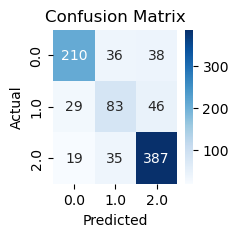

        <<<<<[ END SECTION ] CONFUSION MATRIX
        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        >>>>>[START SECTION] MACRO METRICS
Accuracy: 0.7701 | Precision: 0.7249 | Recall: 0.7141 | F1: 0.7185


C:\Users\FADHIL\AppData\Local\Temp\ipykernel_11788\2122622010.py:642: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


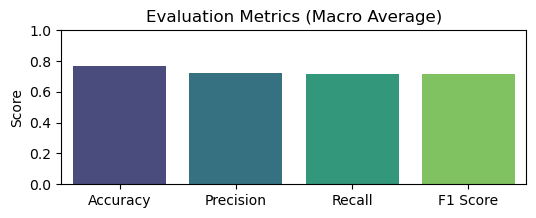

        <<<<<[ END SECTION ] MACRO METRICS
        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        >>>>>[START SECTION] CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77       284
         1.0       0.54      0.53      0.53       158
         2.0       0.82      0.88      0.85       441

    accuracy                           0.77       883
   macro avg       0.72      0.71      0.72       883
weighted avg       0.77      0.77      0.77       883

        <<<<<[ END SECTION ] CLASSIFICATION REPORT
        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

    <<<<<[ END SECTION ] BASICEVAL
    >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


    >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    >>>>>[START SECTION] FEATURE IMPORTANCE
                                    Feature  Importance
43                   performanceIndex2ndSem    

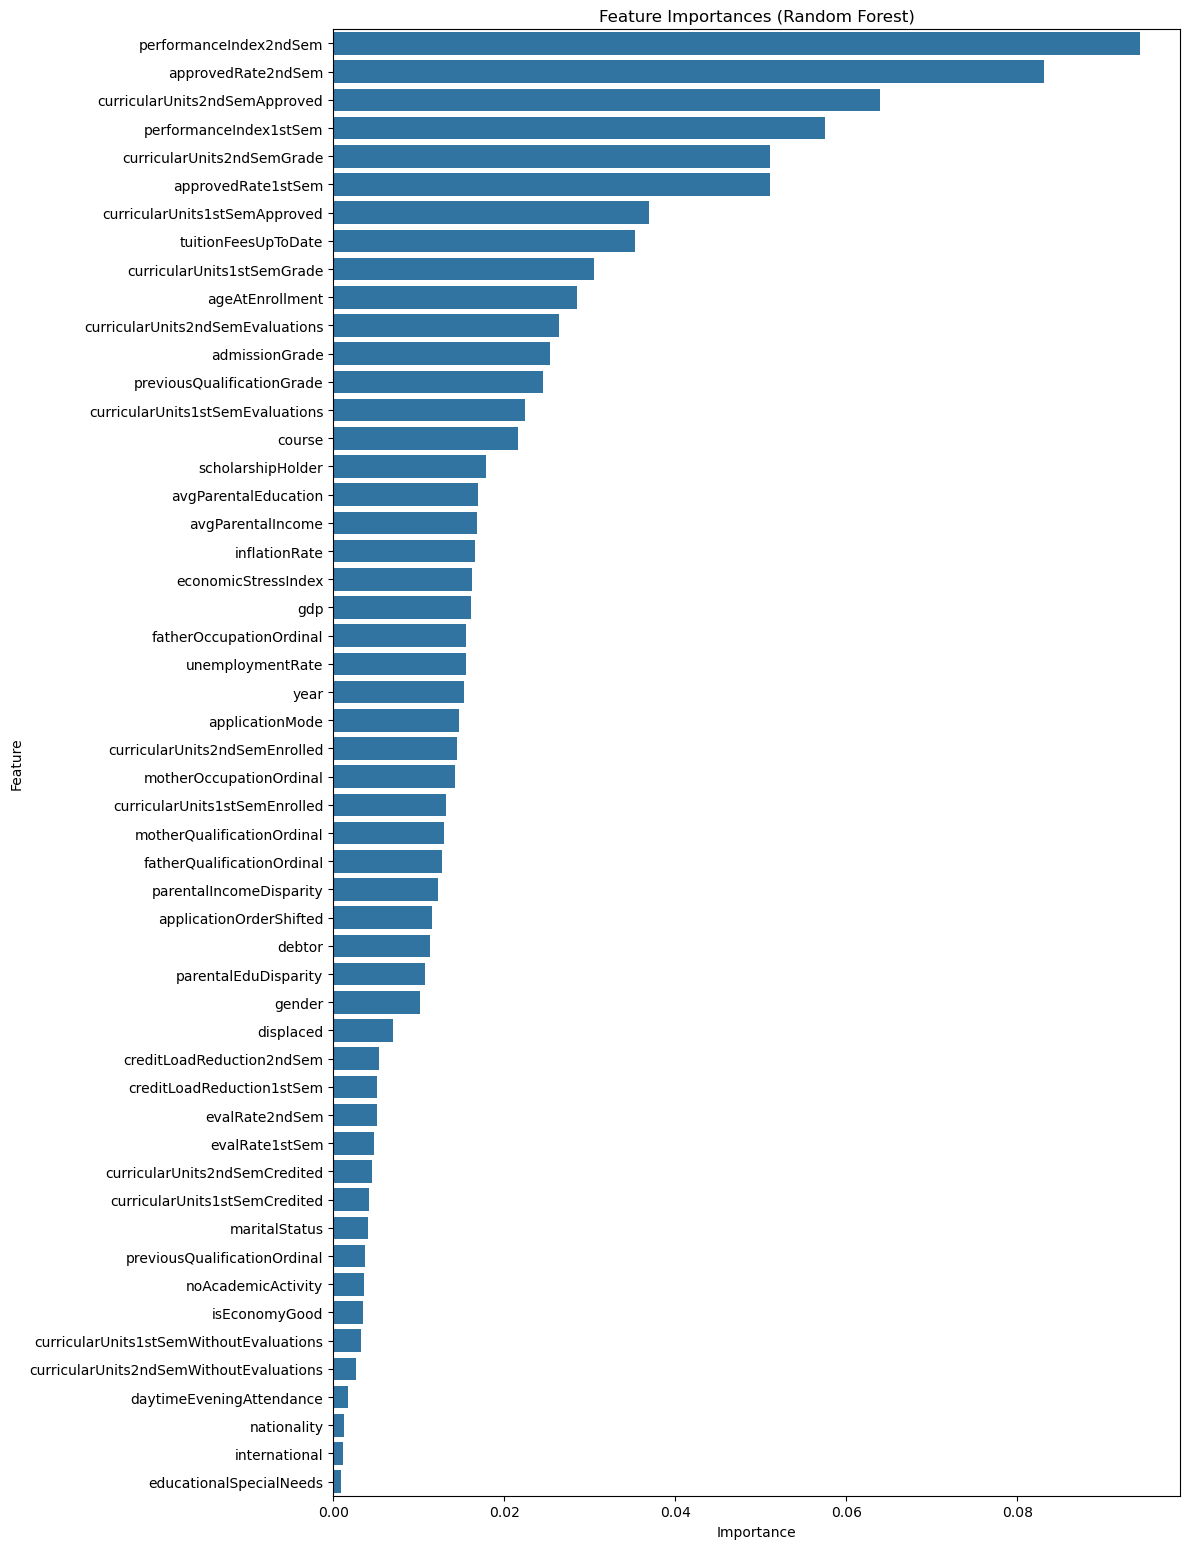

    <<<<<[ END SECTION ] FEATURE IMPORTANCE
    >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

<<<<<[ END SECTION ] TRAIN, EVALUATE, SAVE
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>[START SECTION] PREDICT
Predicted: 0.0 | Actual: 0
Proba: [0.55666667 0.44       0.00333333]
<<<<<[ END SECTION ] PREDICT
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>



In [4]:

df_rf = DF.copy()

def rfPreProc(df_rf):
    df_rf.rename(columns=conversion_dict, inplace=True)
    
    #maritalStatus
    
    #applicationMode
    
    #applicationOrder
    df_rf["applicationOrderShifted"] = df_rf["applicationOrder"] + 1
    df_rf = df_rf.drop("applicationOrder", axis=1)
    
    #course
    
    #daytimeEveningAttendance
    
    #previousQualification
    df_rf["previousQualificationOrdinal"] = df_rf["previousQualification"].map(qualificationOrdinal)
    df_rf = df_rf.drop("previousQualification", axis=1)
    
    #previousQualificationGrade
    
    #nationality
    
    #parent qualification
    df_rf["motherQualificationOrdinal"] = df_rf["motherQualification"].map(qualificationOrdinal)
    df_rf["fatherQualificationOrdinal"] = df_rf["fatherQualification"].map(qualificationOrdinal)
    df_rf["avgParentalEducation"] = df_rf[["motherQualificationOrdinal", "fatherQualificationOrdinal"]].mean(axis=1)
    df_rf["parentalEduDisparity"] = abs(df_rf["motherQualificationOrdinal"] - df_rf["fatherQualificationOrdinal"])
    df_rf = df_rf.drop("motherQualification", axis=1)
    df_rf = df_rf.drop("fatherQualification", axis=1)
    
    #parent occupation
    df_rf["motherOccupationOrdinal"] = df_rf["motherOccupation"].map(occupationOrdinal)
    df_rf["fatherOccupationOrdinal"] = df_rf["fatherOccupation"].map(occupationOrdinal)
    df_rf["avgParentalIncome"] = df_rf[["motherOccupationOrdinal", "fatherOccupationOrdinal"]].mean(axis=1)
    df_rf["parentalIncomeDisparity"] = abs(df_rf["motherOccupationOrdinal"] - df_rf["fatherOccupationOrdinal"])
    df_rf = df_rf.drop("motherOccupation", axis=1)
    df_rf = df_rf.drop("fatherOccupation", axis=1)
    
    #admissionGrade
    
    #displaced
    
    #educationalSpecialNeeds
    
    #tuitionFeesUpToDate
    
    #gender
    
    #scholarshipHolder
    
    #ageAtEnrollment
    
    #international
    
    #curricularUnits
    df_rf["approvedRate1stSem"] = (df_rf["curricularUnits1stSemApproved"] / df_rf["curricularUnits1stSemEnrolled"].replace(0, np.nan)).fillna(0)
    df_rf["approvedRate2ndSem"] = (df_rf["curricularUnits2ndSemApproved"] / df_rf["curricularUnits2ndSemEnrolled"].replace(0, np.nan)).fillna(0)
    df_rf["performanceIndex1stSem"] = (df_rf["approvedRate1stSem"] * df_rf["curricularUnits1stSemGrade"]).fillna(0)
    df_rf["performanceIndex2ndSem"] = (df_rf["approvedRate2ndSem"] * df_rf["curricularUnits2ndSemGrade"]).fillna(0)
    df_rf["creditLoadReduction1stSem"] = (df_rf["curricularUnits1stSemCredited"] / df_rf["curricularUnits1stSemEnrolled"].replace(0, np.nan)).fillna(0)
    df_rf["creditLoadReduction2ndSem"] = (df_rf["curricularUnits2ndSemCredited"] / df_rf["curricularUnits2ndSemEnrolled"].replace(0, np.nan)).fillna(0)
    df_rf["evalRate1stSem"] = (df_rf["curricularUnits1stSemEvaluations"] / (df_rf["curricularUnits1stSemEvaluations"] + df_rf["curricularUnits1stSemWithoutEvaluations"]).replace(0, np.nan)).fillna(0)
    df_rf["evalRate2ndSem"] = (df_rf["curricularUnits2ndSemEvaluations"] / (df_rf["curricularUnits2ndSemEvaluations"] + df_rf["curricularUnits2ndSemWithoutEvaluations"]).replace(0, np.nan)).fillna(0)
    
    inactive_mask = (
        (df_rf["curricularUnits1stSemEnrolled"] == 0) &
        (df_rf["curricularUnits2ndSemEnrolled"] == 0) &
        (df_rf["curricularUnits1stSemEvaluations"] == 0) &
        (df_rf["curricularUnits2ndSemEvaluations"] == 0) &
        (df_rf["curricularUnits1stSemGrade"] == 0) &
        (df_rf["curricularUnits2ndSemGrade"] == 0)
    )
    df_rf["noAcademicActivity"] = inactive_mask.astype(int)

    #econ
    df_rf["economicStressIndex"] = df_rf["unemploymentRate"] + df_rf["inflationRate"] - df_rf["gdp"]
    df_rf["isEconomyGood"] = ((df_rf["gdp"] > 1.5) & (df_rf["unemploymentRate"] < 10)).astype(int)
    
    #year
    df_rf["year"] = df_rf.apply(lambda row: econ_to_year.get((row["unemploymentRate"], row["inflationRate"], row["gdp"])),axis=1)
    
    #unemploymentRate
    
    #inflationRate
    
    #gdp
    
    #target
    df_rf["targetInt"] = (df_rf["target"].map(targetMap).astype("Int64"))
    df_rf = df_rf.drop("target", axis=1)
    
    return df_rf




def rfTrainEval(df_rf, **params_rf):
    X = df_rf.drop("targetInt", axis=1)
    y = df_rf["targetInt"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    #impute missing val
    imputer = SimpleImputer(strategy="mean")
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed  = pd.DataFrame(imputer.transform(X_test),  columns=X_test.columns)
    
    #resample for minority
    smote = SMOTE(random_state=42)
    X_train_imputed_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)
    
    #train
    model_rf = RandomForestClassifier(**params_rf)
    model_rf.fit(X_train_imputed_resampled, y_train_resampled)
    y_pred = model_rf.predict(X_test_imputed)
    
    basicEval(y_test, y_pred, model_rf, str(params_rf))

    __________section__________("feature importance")
    importances = model_rf.feature_importances_
    feature_names = X_train_imputed.columns
    feat_imp_df = (pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False))
    print(feat_imp_df)
    plt.figure(figsize=(12, max(6, len(feat_imp_df) * 0.3)))
    sns.barplot(data=feat_imp_df, x="Importance", y="Feature")
    plt.title("Feature Importances (Random Forest)")
    plt.tight_layout()
    plt.show()
    __________section__________()
    
    return model_rf, imputer, list(X_train_imputed.columns)




__________section__________("preprocessing")
df_rf = rfPreProc(df_rf)
__________section__________()




__________section__________("train, evaluate, save")
#save model
model_rf, rf_imputer, rf_columns = rfTrainEval(
    df_rf,
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight=None,
)
joblib.dump(model_rf, "model_rf.pkl")
joblib.dump(rf_imputer, "model_rf_imputer.pkl")
joblib.dump(rf_columns, "model_rf_columns.pkl")
__________section__________()




__________section__________("predict")
#process stud
stud = DF_USE.iloc[[0]].copy()
stud = rfPreProc(stud)

#extract target
targetInt = stud["targetInt"]
stud = stud.drop("targetInt", axis=1)

#reindex
rf_columns = joblib.load("model_rf_columns.pkl")
stud = stud.reindex(columns=rf_columns, fill_value=0)

#reimpute
rf_imputer = joblib.load("model_rf_imputer.pkl")
stud_imp = pd.DataFrame(rf_imputer.transform(stud), columns=rf_columns)

#predict
model_rf = joblib.load("model_rf.pkl")
pred = model_rf.predict(stud_imp)[0]
proba = model_rf.predict_proba(stud_imp)[0]
print("Predicted:", pred, "| Actual:", targetInt.iloc[0])
print("Proba:", proba)
__________section__________()


# ANN
[BackToTop](#PredictStudentsDropoutAndAcademicSuccess)


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>[START SECTION] PREPROCESSING
<<<<<[ END SECTION ] PREPROCESSING
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>[START SECTION] TRAIN, EVALUATE, SAVE

    >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    >>>>>[START SECTION] BASICEVAL
Parameter: {'hidden_layer_sizes': (64, 32), 'activation': 'relu', 'max_iter': 300, 'early_stopping': True, 'validation_fraction': 0.1, 'learning_rate': 'adaptive', 'random_state': 42, 'verbose': False}

        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        >>>>>[START SECTION] CONFUSION MATRIX
[[206  40  38]
 [ 42  73  43]
 [ 21  39 381]]


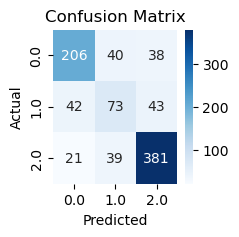

        <<<<<[ END SECTION ] CONFUSION MATRIX
        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        >>>>>[START SECTION] MACRO METRICS
Accuracy: 0.7475 | Precision: 0.6902 | Recall: 0.6838 | F1: 0.6866


C:\Users\FADHIL\AppData\Local\Temp\ipykernel_11788\2122622010.py:642: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


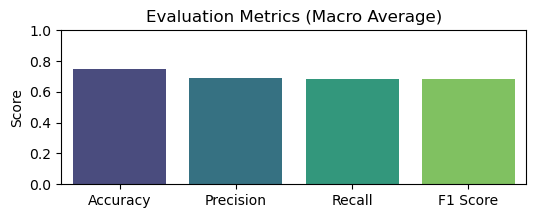

        <<<<<[ END SECTION ] MACRO METRICS
        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        >>>>>[START SECTION] CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75       284
         1.0       0.48      0.46      0.47       158
         2.0       0.82      0.86      0.84       441

    accuracy                           0.75       883
   macro avg       0.69      0.68      0.69       883
weighted avg       0.74      0.75      0.75       883

        <<<<<[ END SECTION ] CLASSIFICATION REPORT
        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

    <<<<<[ END SECTION ] BASICEVAL
    >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

<<<<<[ END SECTION ] TRAIN, EVALUATE, SAVE
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>[START SECTION] PREDICT
Predicted: 0.0 | Actual: 0


In [5]:

df_ann = DF.copy()

scale_ann = {}

def addGetScaleCol(df, col):
    global scale_ann
    if len(df) == 1:
        scaler = scale_ann.get(col)
        if scaler and col in df.columns:
            df[col] = scaler.transform(df[[col]])
        else:
            print(f"⚠️ Skipping '{col}' — scaler missing or column not in df.")
    else:
        scaler = MinMaxScaler()
        df[col] = scaler.fit_transform(df[[col]])
        scale_ann[col] = scaler




def annPreProc(df_ann):
    df_ann.rename(columns=conversion_dict, inplace=True)
    
    #maritalStatus
    df_ann = pd.get_dummies(df_ann, columns=["maritalStatus"], drop_first=False, dtype=int)
    
    #applicationMode
    df_ann = pd.get_dummies(df_ann, columns=["applicationMode"], drop_first=False, dtype=int)
    
    #applicationOrder
    df_ann["applicationOrderShifted"] = df_ann["applicationOrder"] + 1
    addGetScaleCol(df_ann, "applicationOrderShifted")
    df_ann = df_ann.drop("applicationOrder", axis=1)
    
    #course
    df_ann = pd.get_dummies(df_ann, columns=["course"], drop_first=False, dtype=int)
    
    #daytimeEveningAttendance
    df_ann = pd.get_dummies(df_ann, columns=["daytimeEveningAttendance"], drop_first=False, dtype=int)
    
    #previousQualification
    df_ann["previousQualificationOrdinal"] = df_ann["previousQualification"].map(qualificationOrdinal)
    addGetScaleCol(df_ann, "previousQualificationOrdinal")
    df_ann = df_ann.drop("previousQualification", axis=1)
    
    #previousQualificationGrade
    addGetScaleCol(df_ann, "previousQualificationGrade")
    
    #nationality
    df_ann = pd.get_dummies(df_ann, columns=["nationality"], drop_first=False, dtype=int)
    
    #parent qualification
    df_ann["motherQualificationOrdinal"] = df_ann["motherQualification"].map(qualificationOrdinal)
    df_ann["fatherQualificationOrdinal"] = df_ann["fatherQualification"].map(qualificationOrdinal)
    df_ann["avgParentalEducation"] = df_ann[["motherQualificationOrdinal", "fatherQualificationOrdinal"]].mean(axis=1)
    df_ann["parentalEduDisparity"] = abs(df_ann["motherQualificationOrdinal"] - df_ann["fatherQualificationOrdinal"])
    addGetScaleCol(df_ann, "motherQualificationOrdinal")
    addGetScaleCol(df_ann, "fatherQualificationOrdinal")
    addGetScaleCol(df_ann, "avgParentalEducation")
    addGetScaleCol(df_ann, "parentalEduDisparity")
    df_ann = df_ann.drop("motherQualification", axis=1)
    df_ann = df_ann.drop("fatherQualification", axis=1)
    
    #parent occupation
    df_ann["motherOccupationOrdinal"] = df_ann["motherOccupation"].map(occupationOrdinal)
    df_ann["fatherOccupationOrdinal"] = df_ann["fatherOccupation"].map(occupationOrdinal)
    df_ann["avgParentalIncome"] = df_ann[["motherOccupationOrdinal", "fatherOccupationOrdinal"]].mean(axis=1)
    df_ann["parentalIncomeDisparity"] = abs(df_ann["motherOccupationOrdinal"] - df_ann["fatherOccupationOrdinal"])
    addGetScaleCol(df_ann, "motherOccupationOrdinal")
    addGetScaleCol(df_ann, "fatherOccupationOrdinal")
    addGetScaleCol(df_ann, "avgParentalIncome")
    addGetScaleCol(df_ann, "parentalIncomeDisparity")
    df_ann = df_ann.drop("motherOccupation", axis=1)
    df_ann = df_ann.drop("fatherOccupation", axis=1)
    
    #admissionGrade
    addGetScaleCol(df_ann, "admissionGrade")
    
    #displaced
    
    #educationalSpecialNeeds
    
    #tuitionFeesUpToDate
    
    #gender
    df_ann = pd.get_dummies(df_ann, columns=["gender"], drop_first=False, dtype=int)
    
    #scholarshipHolder
    df_ann = pd.get_dummies(df_ann, columns=["scholarshipHolder"], drop_first=False, dtype=int)
    
    #ageAtEnrollment
    addGetScaleCol(df_ann, "ageAtEnrollment")
    
    #international
    
    #curricularUnits
    df_ann["approvedRate1stSem"] = (df_ann["curricularUnits1stSemApproved"] / df_ann["curricularUnits1stSemEnrolled"].replace(0, np.nan)).fillna(0)
    df_ann["approvedRate2ndSem"] = (df_ann["curricularUnits2ndSemApproved"] / df_ann["curricularUnits2ndSemEnrolled"].replace(0, np.nan)).fillna(0)
    df_ann["performanceIndex1stSem"] = (df_ann["approvedRate1stSem"] * df_ann["curricularUnits1stSemGrade"]).fillna(0)
    df_ann["performanceIndex2ndSem"] = (df_ann["approvedRate2ndSem"] * df_ann["curricularUnits2ndSemGrade"]).fillna(0)
    df_ann["creditLoadReduction1stSem"] = (df_ann["curricularUnits1stSemCredited"] / df_ann["curricularUnits1stSemEnrolled"].replace(0, np.nan)).fillna(0)
    df_ann["creditLoadReduction2ndSem"] = (df_ann["curricularUnits2ndSemCredited"] / df_ann["curricularUnits2ndSemEnrolled"].replace(0, np.nan)).fillna(0)
    df_ann["evalRate1stSem"] = (df_ann["curricularUnits1stSemEvaluations"] / (df_ann["curricularUnits1stSemEvaluations"] + df_ann["curricularUnits1stSemWithoutEvaluations"]).replace(0, np.nan)).fillna(0)
    df_ann["evalRate2ndSem"] = (df_ann["curricularUnits2ndSemEvaluations"] / (df_ann["curricularUnits2ndSemEvaluations"] + df_ann["curricularUnits2ndSemWithoutEvaluations"]).replace(0, np.nan)).fillna(0)
    
    inactive_mask = (
        (df_ann["curricularUnits1stSemEnrolled"] == 0) &
        (df_ann["curricularUnits2ndSemEnrolled"] == 0) &
        (df_ann["curricularUnits1stSemEvaluations"] == 0) &
        (df_ann["curricularUnits2ndSemEvaluations"] == 0) &
        (df_ann["curricularUnits1stSemGrade"] == 0) &
        (df_ann["curricularUnits2ndSemGrade"] == 0)
    )
    df_ann["noAcademicActivity"] = inactive_mask.astype(int)
    
    addGetScaleCol(df_ann, "curricularUnits1stSemCredited")
    addGetScaleCol(df_ann, "curricularUnits1stSemEnrolled")
    addGetScaleCol(df_ann, "curricularUnits1stSemEvaluations")
    addGetScaleCol(df_ann, "curricularUnits1stSemApproved")
    addGetScaleCol(df_ann, "curricularUnits1stSemGrade")
    addGetScaleCol(df_ann, "curricularUnits1stSemWithoutEvaluations")
    
    addGetScaleCol(df_ann, "curricularUnits2ndSemCredited")
    addGetScaleCol(df_ann, "curricularUnits2ndSemEnrolled")
    addGetScaleCol(df_ann, "curricularUnits2ndSemEvaluations")
    addGetScaleCol(df_ann, "curricularUnits2ndSemApproved")
    addGetScaleCol(df_ann, "curricularUnits2ndSemGrade")
    addGetScaleCol(df_ann, "curricularUnits2ndSemWithoutEvaluations")
    
    addGetScaleCol(df_ann, "performanceIndex1stSem")
    addGetScaleCol(df_ann, "performanceIndex2ndSem")
    addGetScaleCol(df_ann, "creditLoadReduction1stSem")
    addGetScaleCol(df_ann, "creditLoadReduction2ndSem")

    #econ
    df_ann["economicStressIndex"] = df_ann["unemploymentRate"] + df_ann["inflationRate"] - df_ann["gdp"]
    addGetScaleCol(df_ann, "economicStressIndex")
    df_ann["isEconomyGood"] = ((df_ann["gdp"] > 1.5) & (df_ann["unemploymentRate"] < 10)).astype(int)
    
    #year
    df_ann["year"] = df_ann.apply(lambda row: econ_to_year.get((row["unemploymentRate"], row["inflationRate"], row["gdp"])),axis=1)
    addGetScaleCol(df_ann, "year")
    
    #unemploymentRate
    addGetScaleCol(df_ann, "unemploymentRate")
    
    #inflationRate
    addGetScaleCol(df_ann, "inflationRate")
    
    #gdp
    addGetScaleCol(df_ann, "gdp")
    
    #target
    df_ann["targetInt"] = (df_ann["target"].map(targetMap).astype("Int64"))
    df_ann = df_ann.drop("target", axis=1)
    
    return df_ann



def annTrainEval(df_ann, **params_ann):
    X = df_ann.drop("targetInt", axis=1)
    y = df_ann["targetInt"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    #resample for minority
    sm = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

    #train
    model_ann = MLPClassifier(**params_ann)
    model_ann.fit(X_train_resampled, y_train_resampled)
    y_pred = model_ann.predict(X_test)

    basicEval(y_test, y_pred, model_ann, str(params_ann))

    return model_ann




__________section__________("preprocessing")
df_ann = annPreProc(df_ann)
__________section__________()




__________section__________("train, evaluate, save")
#save scale
joblib.dump(scale_ann, "model_ann_scalers.pkl")

#save model
model_ann = annTrainEval(
    df_ann,
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=300,
    early_stopping=True,
    validation_fraction=0.1,
    learning_rate="adaptive",
    random_state=42,
    verbose=False
)
joblib.dump(model_ann, "model_ann.pkl")

#save collumn
preproc_columns = df_ann.columns.tolist()
joblib.dump(preproc_columns, "model_ann_columns.pkl")
__________section__________()




__________section__________("predict")
#get scale
scale_ann = joblib.load("model_ann_scalers.pkl")

#process stud
stud = DF_USE.iloc[[0]].copy()
stud = annPreProc(stud)

#reindex
preproc_columns = joblib.load("model_ann_columns.pkl")
stud = stud.reindex(columns=preproc_columns, fill_value=0)

#extract target
targetInt = stud["targetInt"]
stud = stud.drop("targetInt", axis=1)

#predict
model_ann = joblib.load("model_ann.pkl")
predictedTarget = model_ann.predict(stud)[0]
print("Predicted:", predictedTarget, "| Actual:", targetInt.iloc[0])
print(model_ann.predict_proba(stud)[0])
__________section__________()


# HistGradientBoostingClassifier
[BackToTop](#PredictStudentsDropoutAndAcademicSuccess)


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>[START SECTION] PREPROCESSING
<<<<<[ END SECTION ] PREPROCESSING
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>[START SECTION] TRAIN, EVALUATE, SAVE

    >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    >>>>>[START SECTION] BASICEVAL
Parameter: {'learning_rate': 0.1, 'max_iter': 100, 'max_depth': 7, 'random_state': 42}

        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        >>>>>[START SECTION] CONFUSION MATRIX
[[214  35  35]
 [ 36  75  47]
 [ 21  24 396]]


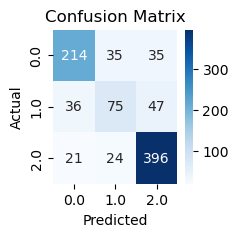

        <<<<<[ END SECTION ] CONFUSION MATRIX
        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        >>>>>[START SECTION] MACRO METRICS
Accuracy: 0.7758 | Precision: 0.7259 | Recall: 0.7087 | F1: 0.7156


C:\Users\FADHIL\AppData\Local\Temp\ipykernel_11788\4274661856.py:645: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


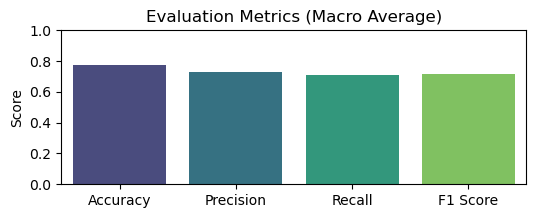

        <<<<<[ END SECTION ] MACRO METRICS
        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        >>>>>[START SECTION] CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       284
         1.0       0.56      0.47      0.51       158
         2.0       0.83      0.90      0.86       441

    accuracy                           0.78       883
   macro avg       0.73      0.71      0.72       883
weighted avg       0.77      0.78      0.77       883

        <<<<<[ END SECTION ] CLASSIFICATION REPORT
        >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

    <<<<<[ END SECTION ] BASICEVAL
    >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

<<<<<[ END SECTION ] TRAIN, EVALUATE, SAVE
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>[START SECTION] PREDICT
Predicted: 0.0 | Actual: 0


In [11]:

df_hgb = DF.copy()

def hgbPreProc(df_hgb):
    df_hgb.rename(columns=conversion_dict, inplace=True)
    
    #maritalStatus
    
    #applicationMode
    
    #applicationOrder
    df_hgb["applicationOrderShifted"] = df_hgb["applicationOrder"] + 1
    df_hgb = df_hgb.drop("applicationOrder", axis=1)
    
    #course
    
    #daytimeEveningAttendance
    
    #previousQualification
    df_hgb["previousQualificationOrdinal"] = df_hgb["previousQualification"].map(qualificationOrdinal)
    df_hgb = df_hgb.drop("previousQualification", axis=1)
    
    #previousQualificationGrade
    
    #nationality
    
    #parent qualification
    df_hgb["motherQualificationOrdinal"] = df_hgb["motherQualification"].map(qualificationOrdinal)
    df_hgb["fatherQualificationOrdinal"] = df_hgb["fatherQualification"].map(qualificationOrdinal)
    df_hgb["avgParentalEducation"] = df_hgb[["motherQualificationOrdinal", "fatherQualificationOrdinal"]].mean(axis=1)
    df_hgb["parentalEduDisparity"] = abs(df_hgb["motherQualificationOrdinal"] - df_hgb["fatherQualificationOrdinal"])
    df_hgb = df_hgb.drop("motherQualification", axis=1)
    df_hgb = df_hgb.drop("fatherQualification", axis=1)
    
    #parent occupation
    df_hgb["motherOccupationOrdinal"] = df_hgb["motherOccupation"].map(occupationOrdinal)
    df_hgb["fatherOccupationOrdinal"] = df_hgb["fatherOccupation"].map(occupationOrdinal)
    df_hgb["avgParentalIncome"] = df_hgb[["motherOccupationOrdinal", "fatherOccupationOrdinal"]].mean(axis=1)
    df_hgb["parentalIncomeDisparity"] = abs(df_hgb["motherOccupationOrdinal"] - df_hgb["fatherOccupationOrdinal"])
    df_hgb = df_hgb.drop("motherOccupation", axis=1)
    df_hgb = df_hgb.drop("fatherOccupation", axis=1)
    
    #admissionGrade
    
    #displaced
    
    #educationalSpecialNeeds
    
    #tuitionFeesUpToDate
    
    #gender
    
    #scholarshipHolder
    
    #ageAtEnrollment
    
    #international
    
    #curricularUnits
    df_hgb["approvedRate1stSem"] = (df_hgb["curricularUnits1stSemApproved"] / df_hgb["curricularUnits1stSemEnrolled"].replace(0, np.nan)).fillna(0)
    df_hgb["approvedRate2ndSem"] = (df_hgb["curricularUnits2ndSemApproved"] / df_hgb["curricularUnits2ndSemEnrolled"].replace(0, np.nan)).fillna(0)
    df_hgb["performanceIndex1stSem"] = (df_hgb["approvedRate1stSem"] * df_hgb["curricularUnits1stSemGrade"]).fillna(0)
    df_hgb["performanceIndex2ndSem"] = (df_hgb["approvedRate2ndSem"] * df_hgb["curricularUnits2ndSemGrade"]).fillna(0)
    df_hgb["creditLoadReduction1stSem"] = (df_hgb["curricularUnits1stSemCredited"] / df_hgb["curricularUnits1stSemEnrolled"].replace(0, np.nan)).fillna(0)
    df_hgb["creditLoadReduction2ndSem"] = (df_hgb["curricularUnits2ndSemCredited"] / df_hgb["curricularUnits2ndSemEnrolled"].replace(0, np.nan)).fillna(0)
    df_hgb["evalRate1stSem"] = (df_hgb["curricularUnits1stSemEvaluations"] / (df_hgb["curricularUnits1stSemEvaluations"] + df_hgb["curricularUnits1stSemWithoutEvaluations"]).replace(0, np.nan)).fillna(0)
    df_hgb["evalRate2ndSem"] = (df_hgb["curricularUnits2ndSemEvaluations"] / (df_hgb["curricularUnits2ndSemEvaluations"] + df_hgb["curricularUnits2ndSemWithoutEvaluations"]).replace(0, np.nan)).fillna(0)
    
    inactive_mask = (
        (df_hgb["curricularUnits1stSemEnrolled"] == 0) &
        (df_hgb["curricularUnits2ndSemEnrolled"] == 0) &
        (df_hgb["curricularUnits1stSemEvaluations"] == 0) &
        (df_hgb["curricularUnits2ndSemEvaluations"] == 0) &
        (df_hgb["curricularUnits1stSemGrade"] == 0) &
        (df_hgb["curricularUnits2ndSemGrade"] == 0)
    )
    df_hgb["noAcademicActivity"] = inactive_mask.astype(int)

    #econ
    df_hgb["economicStressIndex"] = df_hgb["unemploymentRate"] + df_hgb["inflationRate"] - df_hgb["gdp"]
    df_hgb["isEconomyGood"] = ((df_hgb["gdp"] > 1.5) & (df_hgb["unemploymentRate"] < 10)).astype(int)
    
    #year
    df_hgb["year"] = df_hgb.apply(lambda row: econ_to_year.get((row["unemploymentRate"], row["inflationRate"], row["gdp"])),axis=1)
    
    #unemploymentRate
    
    #inflationRate
    
    #gdp
    
    #target
    df_hgb["targetInt"] = (df_hgb["target"].map(targetMap).astype("Int64"))
    df_hgb = df_hgb.drop("target", axis=1)
    
    return df_hgb




def hgbTrainEval(df_hgb, **params_hgb):
    X = df_hgb.drop("targetInt", axis=1)
    y = df_hgb["targetInt"]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Impute (mean for numeric, most_frequent for categorical)
    imputer = SimpleImputer(strategy="mean")
    X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
    X_test_imp = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

    # SMOTE (optional: better to skip if you want native class balance handling)
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_imp, y_train)

    # Train model
    model_hgb = HistGradientBoostingClassifier(**params_hgb)
    model_hgb.fit(X_resampled, y_resampled)

    # Evaluate
    y_pred = model_hgb.predict(X_test_imp)

    basicEval(y_test, y_pred, model_hgb, str(params_hgb))
    
    return model_hgb, imputer, list(X.columns)




__________section__________("preprocessing")
df_hgb = hgbPreProc(df_hgb)
__________section__________()





__________section__________("train, evaluate, save")

model_hgb, hgb_imputer, hgb_columns = hgbTrainEval(
    df_hgb,
    learning_rate=0.1,
    max_iter=100,
    max_depth=7,
    random_state=42,
)

joblib.dump(model_hgb, "model_hgb.pkl")
joblib.dump(hgb_imputer, "model_hgb_imputer.pkl")
joblib.dump(hgb_columns, "model_hgb_columns.pkl")

__________section__________()





__________section__________("predict")
#process stud
stud = DF_USE.iloc[[0]].copy()
stud = hgbPreProc(stud)

#extract target
targetInt = stud["targetInt"]
stud = stud.drop("targetInt", axis=1)

#reindex
hgb_columns = joblib.load("model_hgb_columns.pkl")
stud = stud.reindex(columns=hgb_columns, fill_value=0)

#reimpute
hgb_imputer = joblib.load("model_hgb_imputer.pkl")
stud_imp = pd.DataFrame(hgb_imputer.transform(stud), columns=hgb_columns)

#predict
model_hgb = joblib.load("model_hgb.pkl")
pred = model_hgb.predict(stud_imp)[0]
proba = model_hgb.predict_proba(stud_imp)[0]
print("Predicted:", pred, "| Actual:", targetInt.iloc[0])
print("Proba:", proba)
__________section__________()


# Predict
[BackToTop](#PredictStudentsDropoutAndAcademicSuccess)

In [17]:
__________section__________("stud sample num 0 from 10")
print(DF_USE.iloc[0])


            >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            >>>>>[START SECTION] STUD SAMPLE NUM 0 FROM 10
Marital status                                          4
Application mode                                       39
Application order                                       1
Course                                               9130
Daytime/evening attendance                              1
Previous qualification                                  1
Previous qualification (grade)                      133.1
Nacionality                                             1
Mothers qualification                                   3
Fathers qualification                                   1
Mothers occupation                                      5
Fathers occupation                                      5
Admission grade                                     110.0
Displaced                                               1
Educational special needs                               0
Debtor 

In [6]:
print("RandomForest                   : 1")
print("ANN                            : 2")
print("HistGradientBoostingClassifier : 3")
model = input("Pick model                     :")

stud = {}
for long_col, short_col in conversion_dict.items():
    val = input(f"{long_col}: ")
    stud[short_col] = val
    if short_col == "applicationOrder":
        break

df_input = pd.DataFrame([stud])
print("\nPreview of entered data:")
print(df_input)

if model == "1":
    #process stud
    stud = df_input.copy()
    stud = rfPreProc(stud)
    
    #extract target
    targetInt = stud["targetInt"]
    stud = stud.drop("targetInt", axis=1)
    
    #reindex
    rf_columns = joblib.load("model_rf_columns.pkl")
    stud = stud.reindex(columns=rf_columns, fill_value=0)
    
    #reimpute
    rf_imputer = joblib.load("model_rf_imputer.pkl")
    stud_imp = pd.DataFrame(rf_imputer.transform(stud), columns=rf_columns)
    
    #predict
    model_rf = joblib.load("model_rf.pkl")
    pred = model_rf.predict(stud_imp)[0]
    proba = model_rf.predict_proba(stud_imp)[0]
    print("Predicted:", pred, "| Actual:", targetInt.iloc[0])
    print("Proba:", proba)

if model == "2":
    #get scale
    scale_ann = joblib.load("model_ann_scalers.pkl")
    
    #process stud
    stud = df_input.copy()
    stud = annPreProc(stud)
    
    #reindex
    preproc_columns = joblib.load("model_ann_columns.pkl")
    stud = stud.reindex(columns=preproc_columns, fill_value=0)
    
    #extract target
    targetInt = stud["targetInt"]
    stud = stud.drop("targetInt", axis=1)
    
    #predict
    model_ann = joblib.load("model_ann.pkl")
    predictedTarget = model_ann.predict(stud)[0]
    print("Predicted:", predictedTarget, "| Actual:", targetInt.iloc[0])
    print(model_ann.predict_proba(stud)[0])

if model == "3":
    #process stud
    stud = df_input.copy()
    stud = hgbPreProc(stud)
    
    #extract target
    targetInt = stud["targetInt"]
    stud = stud.drop("targetInt", axis=1)
    
    #reindex
    hgb_columns = joblib.load("model_hgb_columns.pkl")
    stud = stud.reindex(columns=hgb_columns, fill_value=0)
    
    #reimpute
    hgb_imputer = joblib.load("model_hgb_imputer.pkl")
    stud_imp = pd.DataFrame(hgb_imputer.transform(stud), columns=hgb_columns)
    
    #predict
    model_hgb = joblib.load("model_hgb.pkl")
    pred = model_hgb.predict(stud_imp)[0]
    proba = model_hgb.predict_proba(stud_imp)[0]
    print("Predicted:", pred, "| Actual:", targetInt.iloc[0])
    print("Proba:", proba)



RandomForest                   : 1
ANN                            : 2
HistGradientBoostingClassifier : 3


Pick model                     : 1
Marital status:  1
Application mode:  1
Application order:  1



Preview of entered data:
  maritalStatus applicationMode applicationOrder
0             1               1                1


[BackToTop](#PredictStudentsDropoutAndAcademicSuccess)